In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/same same')


In [3]:
!pip install scikit-learn pandas numpy tqdm

In [4]:
!pip install xgboost



In [ ]:
from xgboost import XGBClassifier


In [ ]:
!pip install lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt

Original columns: ['Unnamed: 0.1', 'Unnamed: 0', 'geometry', 'parking', 'edges', 'EV_stations', 'parking_space', 'civic', 'restaurant', 'park', 'school', 'node', 'Community_centre', 'place_of_worship', 'university', 'cinema', 'library', 'commercial', 'retail', 'townhall', 'government', 'residential', 'city', 'population', 'Berlin_data_onlycenter_']


Evaluating Models:  33%|███▎      | 1/3 [00:00<00:01,  1.40it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Info] Number of positive: 978, number of negative: 7681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 8659, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112946 -> initscore=-2.060995
[Ligh

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Evaluating Models:  67%|██████▋   | 2/3 [00:01<00:00,  1.61it/s]

[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


Evaluating Models: 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



✅ Model Performance Results:
      Model  Accuracy  Precision  Recall  F1-score  ROC AUC
0   XGBoost     0.905      0.891   0.905     0.893    0.900
1  LightGBM     0.901      0.887   0.901     0.890    0.896
2  CatBoost     0.902      0.885   0.902     0.887    0.907
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Info] Number of positive: 978, number of negative: 7681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And 

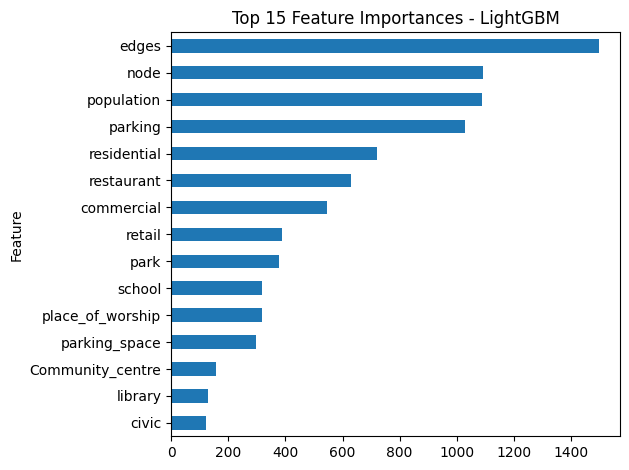

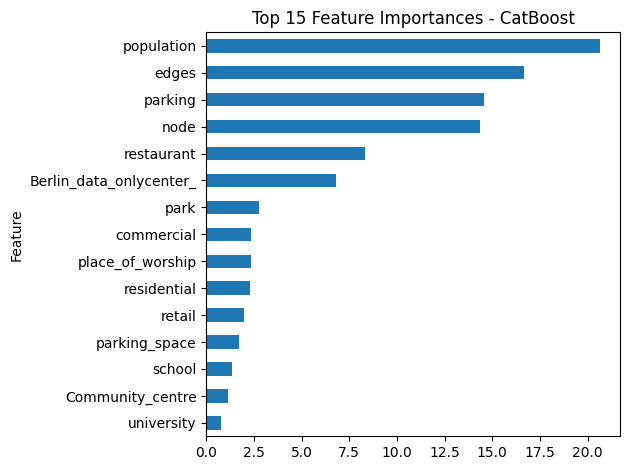

In [ ]:
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from tqdm import tqdm
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# ✅ Load your real dataset
df = pd.read_csv("data/processed/all_city_data_with_pop.csv")
print("Original columns:", df.columns.tolist())

# ✅ Create label if not already there
if 'label' not in df.columns:
    df['label'] = (df['EV_stations'] > 0).astype(int)

# ✅ Drop columns that might leak information or aren't useful
drop_cols = ['label', 'EV_stations', 'Unnamed: 0', 'Unnamed: 0.1', 'geometry', 'city']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['label']

# ✅ Keep only numeric columns and fill NaNs
X = X.select_dtypes(include=[np.number])
X = X.fillna(0)

# ✅ Remove low-variance features
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
X_reduced = selector.fit_transform(X)

# ✅ Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# ✅ Models to evaluate
models = [
    ("XGBoost", XGBClassifier(n_estimators=300, learning_rate=0.05, random_state=42)),
    ("LightGBM", LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=-1, num_leaves=31,
                                min_data_in_leaf=15, min_gain_to_split=0.01, random_state=42)),
    ("CatBoost", CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, verbose=0, random_state=42))
]

# ✅ Evaluate models
results = []

for model_name, model in tqdm(models, desc="Evaluating Models"):
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_score = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
        auc = roc_auc_score(y_test, y_score) if y_score is not None else None

        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1,
            "ROC AUC": auc
        })

    except Exception as e:
        print(f"❌ Error with {model_name}: {e}")

# ✅ Display sorted results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-score", ascending=False)
print("\n✅ Model Performance Results:")
print(results_df.reset_index(drop=True).round(3))

# Optional: Feature Importance for LightGBM and CatBoost

# LightGBM Feature Importance
if "LightGBM" in results_df["Model"].values:
    lgb_model = LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=-1, num_leaves=31,
                               min_data_in_leaf=15, min_gain_to_split=0.01, random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_feat_df = pd.DataFrame({'Feature': X.columns[selector.get_support()], 'Importance': lgb_model.feature_importances_})
    lgb_feat_df = lgb_feat_df.sort_values(by='Importance', ascending=False)
    lgb_feat_df.head(15).plot(kind='barh', x='Feature', y='Importance', legend=False)
    plt.title("Top 15 Feature Importances - LightGBM")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# CatBoost Feature Importance
if "CatBoost" in results_df["Model"].values:
    cat_model = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, verbose=0, random_state=42)
    cat_model.fit(X_train, y_train)
    cat_feat_df = pd.DataFrame({'Feature': X.columns[selector.get_support()], 'Importance': cat_model.get_feature_importance()})
    cat_feat_df = cat_feat_df.sort_values(by='Importance', ascending=False)
    cat_feat_df.head(15).plot(kind='barh', x='Feature', y='Importance', legend=False)
    plt.title("Top 15 Feature Importances - CatBoost")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
